## Import the libraries

In [1]:
import pandas as pd
import os,sys
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data from 20_newspapers folder

In [2]:
x=[]   #x is the list where 1st element is no. of document and second element is text in document
y=[]   # y is the category of document
for category in os.listdir("20_newsgroups"):
    for document in os.listdir("20_newsgroups/"+category):
        with open("20_newsgroups/"+category+'/'+document, "r") as f:
            x.append((document,f.read()))
            y.append(category)

In [3]:
print("The total number of data Points: ",len(x),len(y))

The total number of data Points:  19997 19997


In [4]:
#x stores the data
#y stores the categories/class
print("The classes/categories are: ",set(y))

The classes/categories are:  {'rec.autos', 'comp.graphics', 'sci.crypt', 'talk.politics.mideast', 'talk.politics.misc', 'talk.politics.guns', 'comp.os.ms-windows.misc', 'alt.atheism', 'sci.space', 'rec.sport.hockey', 'comp.windows.x', 'rec.motorcycles', 'talk.religion.misc', 'soc.religion.christian', 'misc.forsale', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'rec.sport.baseball', 'sci.med', 'comp.sys.mac.hardware'}


In [5]:
#random splitting the data into train and test
x_train,x_test,y_train,y_test= train_test_split(x,y)
print( len(x_train), len(x_test), len(y_train), len(y_test))

14997 5000 14997 5000


<b> LIST OF STOPWORDS </b>

In [6]:
stop_words=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

## CREATE THE VOCABOLARY FROM TRAINING DATA

In [7]:
import re,string
import operator
dic={}    #words with coreesonding frequency
for i in range (len(x_train)):
    word=x_train[i][1].lower()
    stripped=re.split(r'\W+',word)
    for s in stripped:
        if not (s.isalpha()) or s in stop_words or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True) #list of words & freq in desc order
len(sorted_dic)

92772

<function matplotlib.pyplot.show(*args, **kw)>

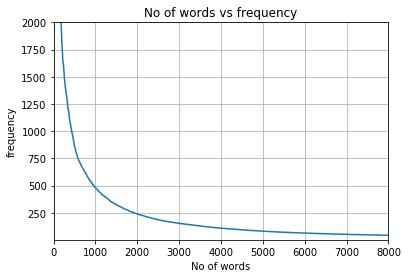

In [9]:
#No of words vs frequency graph
features=sorted_dic
ans1=[]
ans2=[]
for i in range (len(features)):
    ans1.append(i)
    ans2.append(features[i][1])
plt.plot(ans1,ans2)
plt.axis([0,8000,1,2000])
plt.title("No of words vs frequency")
plt.xlabel("No of words")
plt.ylabel("frequency")
plt.grid()
plt.show

In [10]:
#Select the top 2000 words: frequency and put into vocabulary-dictionary(Since, they matter)
#vocabulary is implemented as dict due to O(1) search time
vocabulary= {}
for i in range(2000):
    vocabulary[features[i][0]]= features[i][1]

## CREATE THE DATASET

In [10]:
def createDataSet(x):
    
    columns= list(vocabulary.keys())
    dataSet= np.zeros((len(x), len(columns))) #create a zero array
    for i in range(len(x)): #go through each document
        words=x[i][1].lower()
        word=re.split(r'\W+',words)
        for j in word:
            if j in vocabulary: #if present in the vocab, add in dataSet and increase frequency
                 dataSet[i][columns.index(j)]+=1
    return dataSet             

In [11]:
x_train_data= createDataSet(x_train)

In [12]:
x_test_data= createDataSet(x_test)

In [13]:
#converting a numPy 2D array into dataFrame(for easy visualisation)
df_xtrain = pd.DataFrame(x_train_data, columns= vocabulary.keys())
df_xtrain

,edu,cmu,com,news,not,srv,cantaloupe,net,message,subject,...,bedfellow,apc,brother,holocaust,operating,minor,davidians,hst,active,client
0,9.0,4.0,9.0,0.0,3.0,3.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,3.0,8.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,13.0,4.0,4.0,4.0,9.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,9.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,8.0,4.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14993,12.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14994,14.0,1.0,0.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14995,3.0,1.0,0.0,1.0,0.0,1.0,1.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y_train_data = np.array(y_train) 
y_test_data = np.array(y_test) 

In [15]:
y_test_data

array(['comp.sys.ibm.pc.hardware', 'rec.sport.baseball',
       'comp.sys.mac.hardware', ..., 'alt.atheism', 'talk.religion.misc',
       'rec.motorcycles'], dtype='<U24')

<b><u> x_train_data, x_test_data, y_train_data, y_test_data are the DataSets in the required format </u></b>

# Using Sklearn Multinomial Naive Bayes 

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
clf = MultinomialNB()
clf.fit(x_train_data, y_train_data)
y_pred = clf.predict(x_test_data)
print("ACCURACY OF SKLEARN NAIVEBAYES: ",clf.score(x_test_data,y_test_data))

ACCURACY OF SKLEARN NAIVEBAYES:  0.8666


In [17]:
print(classification_report(y_test_data,y_pred))
print(confusion_matrix(y_test_data,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.82      0.81       257
           comp.graphics       0.86      0.76      0.81       248
 comp.os.ms-windows.misc       0.85      0.84      0.85       251
comp.sys.ibm.pc.hardware       0.74      0.82      0.78       218
   comp.sys.mac.hardware       0.83      0.90      0.86       255
          comp.windows.x       0.89      0.76      0.82       232
            misc.forsale       0.78      0.94      0.85       245
               rec.autos       0.88      0.91      0.89       232
         rec.motorcycles       0.91      0.96      0.93       254
      rec.sport.baseball       0.94      0.92      0.93       266
        rec.sport.hockey       0.94      0.93      0.93       241
               sci.crypt       0.98      0.95      0.96       256
         sci.electronics       0.85      0.91      0.88       264
                 sci.med       0.96      0.89      0.92       230
         

## Implementing our NAIVE BAYES CLASSIFIER

In [18]:
#create dictionary from the training data
def fit(x_train,y_train):
    result={}
    class_values = set(y_train) #distinct class values
    for current_class in class_values:
        result[current_class] = {}
        result["total_docs"]= x_train.shape[0] #total_docs: total num of documents
        current_class_rows = (y_train == current_class) #returns true/false array
        x_train_current = x_train[current_class_rows] #X_train_current is the array of rows with the specified class
        y_train_current = y_train[current_class_rows] #Y_train_current is the y with the specified class
        num_features = x_train.shape[1] #2000 words
        total_count=0 
        for j in range(num_features): #go through all the words
            count = x_train_current[:,j].sum() #No of Wi in current class
            result[current_class][j]= count
            total_count= total_count+count
        result[current_class]["count_words_class"]= total_count #No of words in currentClass
        result[current_class]["count_docs_class"]= x_train_current.shape[0] #No of documents of the class
    return result

In [19]:
#computes log probability of the current class
def probability(dictionary, x, current_class):
    output = np.log(dictionary[current_class]["count_docs_class"]) - np.log(dictionary["total_docs"]) #P(y=c1)
    num_features = len(dictionary[current_class].keys()) - 2; #sice last 2 are (count_words_class & count_docs_class)
    
    #go through each feature
    #compute PI( P(Wj= wj / y=ci))
    for j in range(num_features):
        xj = x[j] #freq of that word
        if xj==0: #if word doesnt exist in input
            continue
        count_current_class_with_value_xj = dictionary[current_class][j] + 1 #add Laplace correction
        count_current_class = dictionary[current_class]["count_words_class"] + num_features 
        current_xj_probability = np.log(count_current_class_with_value_xj) - np.log(count_current_class)
        current_xj_probability= xj * current_xj_probability #log(m^n)= nlog(m)
        output = output + current_xj_probability
    return output

In [20]:
#predict class for a single row of input
def predictSinglePoint(dictionary, x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        if (current_class == "total_docs"): #Since,total_docs is also a key
            continue
        #find prob for every class and choose the class with max Prob
        p_current_class = probability(dictionary, x, current_class) 
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

In [21]:
def predict(dictionary, x_test):
    y_pred = []
    for x in x_test:
        x_class = predictSinglePoint(dictionary, x) #predict y for a single row of input
        y_pred.append(x_class)
    return y_pred

## Use our Naive Bayes Classifier to predict test data

In [22]:
#the fit function returns the dictionary from the training data
dictionary = fit(x_train_data,y_train_data)

In [23]:
#predict function returns the Y_pred, takes dictionary as input
y_pred = predict(dictionary,x_test_data)

In [24]:
from sklearn.metrics import accuracy_score 
print ('Accuracy Score :',accuracy_score(y_test_data, y_pred))

Accuracy Score : 0.8666


In [25]:
print(classification_report(y_test_data,y_pred))
print(confusion_matrix(y_test_data,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.82      0.81       257
           comp.graphics       0.86      0.76      0.81       248
 comp.os.ms-windows.misc       0.85      0.84      0.85       251
comp.sys.ibm.pc.hardware       0.74      0.82      0.78       218
   comp.sys.mac.hardware       0.83      0.90      0.86       255
          comp.windows.x       0.89      0.76      0.82       232
            misc.forsale       0.78      0.94      0.85       245
               rec.autos       0.88      0.91      0.89       232
         rec.motorcycles       0.91      0.96      0.93       254
      rec.sport.baseball       0.94      0.92      0.93       266
        rec.sport.hockey       0.94      0.93      0.93       241
               sci.crypt       0.98      0.95      0.96       256
         sci.electronics       0.85      0.91      0.88       264
                 sci.med       0.96      0.89      0.92       230
         

## Conclusion

<b> Sklearn Multinomial Naive Bayes and Our Naive Bayes implementation gave exactly the same accuracy and confusion Matrix. The accuracy largely depends on the selection of words(preprocessing of data)